In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as colormap
import numpy as np
np.random.seed(1)

In [2]:
def plot_acc(accdict):
    figure = plt.gcf()
    figure.set_size_inches(12, 6)
    ax = plt.subplot()
    plt.ylabel('Accuracy')
    plt.xlabel('Fold')
    if len(accdict)==2:
        colors = ['blue','red']
        lines = ['-','-']
    else:
        colors = ['blue','blue','red','red']
        lines = ['-','--','-','--']
    for index in accdict.keys():
        color=colors[index]
        line=lines[index]
        plt.plot(accdict[index].values()[0], label=accdict[index].keys()[0], color=color, marker='o', linestyle=line, linewidth=1.0)
    x1,x2,y1,y2 = plt.axis()
    plt.axis((x1,x2,0.95,1.0))
    plt.legend()
    box = ax.get_position()
    ax.legend(loc='lower right')
    #plt.tight_layout()
    
    spacing = 1
    minorLocator = MultipleLocator(spacing)
    ax.xaxis.set_minor_locator(minorLocator)
    ax.grid(which = 'minor')
    plt.xticks(np.arange(0, 10, 1.0))
    
    plt.grid(True)
    plt.show()

In [3]:
accdict = {}

DCNNacc = [0.9820, 0.9830, 0.9883, 0.9882, 0.9829, 0.9893, 0.9860, 0.9882, 0.9870, 0.9870]
GISTacc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict = {0: {'DCNN': DCNNacc},
           1: {'GIST with kNN (k=4)': GISTacc}}

In [4]:
for i in accdict.keys():
    print(accdict[i])

{'DCNN': [0.982, 0.983, 0.9883, 0.9882, 0.9829, 0.9893, 0.986, 0.9882, 0.987, 0.987]}
{'GIST with kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


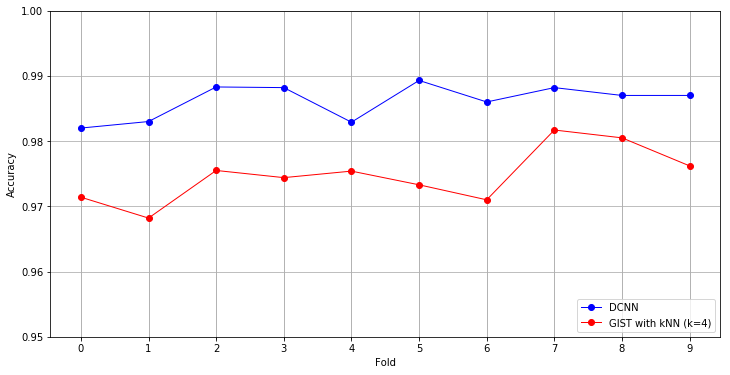

In [5]:
plot_acc(accdict)

In [6]:
accdict2 = {}

DCNNkNNk3acc = [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]
DCNNkNNk4acc = [0.9757, 0.9756, 0.9765, 0.9818, 0.9850, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]
GISTkNNk3acc = [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]
GISTkNNk4acc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict2 = {0: {'DCNN with kNN (k=3)': DCNNkNNk3acc},
            1: {'DCNN with kNN (k=4)': DCNNkNNk4acc},
            2: {'GIST with kNN (k=3)': GISTkNNk3acc},
            3: {'GIST with kNN (k=4)': GISTkNNk4acc}}

In [7]:
for i in accdict2.keys():
    print(accdict2[i])

{'DCNN with kNN (k=3)': [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]}
{'DCNN with kNN (k=4)': [0.9757, 0.9756, 0.9765, 0.9818, 0.985, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]}
{'GIST with kNN (k=3)': [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]}
{'GIST with kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


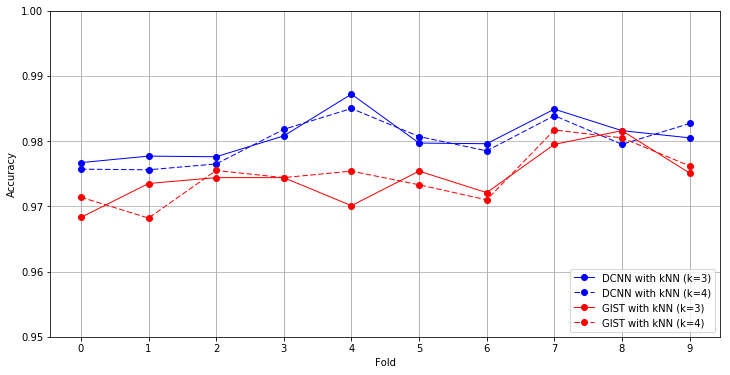

In [8]:
plot_acc(accdict2)

0.00104094508341


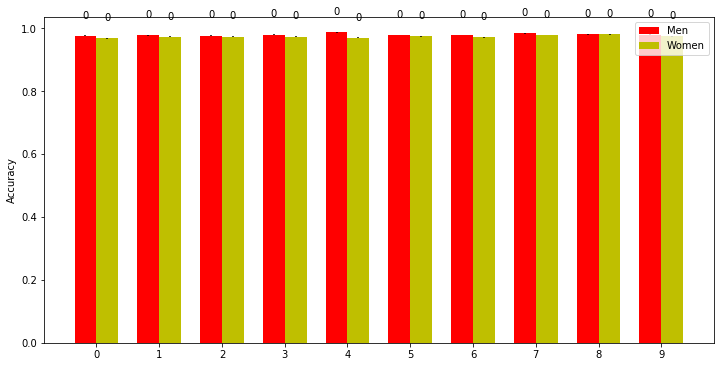

In [24]:
from scipy import stats

N = 10
men_means = [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]
men_std = stats.sem(np.array(men_means))
print(men_std)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.gcf()
fig.set_size_inches(12, 6)
ax = plt.subplot()

rects1 = ax.bar(ind, men_means, width, color='r', yerr=men_std)

women_means = [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]
women_std = stats.sem(np.array(women_means))

rects2 = ax.bar(ind + width, women_means, width, color='y', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Accuracy')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ind)

ax.legend((rects1[0], rects2[0]), ('Men', 'Women'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [9]:
accdict3 = {}

DCNNkNNk3acc = [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]
GISTkNNk3acc = [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]

accdict3 = {0: {'DCNN with kNN (k=3)': DCNNkNNk3acc},
            1: {'GIST with kNN (k=3)': GISTkNNk3acc}}

In [10]:
for i in accdict3.keys():
    print(accdict3[i])

{'DCNN with kNN (k=3)': [0.9767, 0.9777, 0.9776, 0.9808, 0.9872, 0.9797, 0.9796, 0.9849, 0.9816, 0.9805]}
{'GIST with kNN (k=3)': [0.9683, 0.9735, 0.9744, 0.9744, 0.9701, 0.9754, 0.9721, 0.9795, 0.9816, 0.9751]}


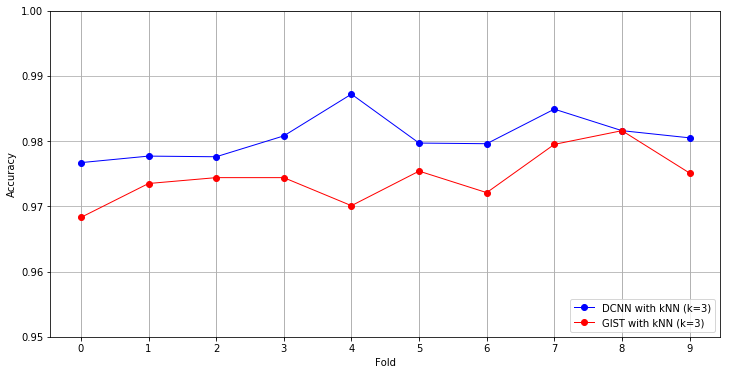

In [11]:
plot_acc(accdict3)

In [12]:
accdict4 = {}

DCNNkNNk4acc = [0.9757, 0.9756, 0.9765, 0.9818, 0.9850, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]
GISTkNNk4acc = [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.9710, 0.9817, 0.9805, 0.9762]

accdict4 = {0: {'DCNN with kNN (k=4)': DCNNkNNk4acc},
            1: {'GIST with kNN (k=4)': GISTkNNk4acc}}

In [13]:
for i in accdict4.keys():
    print(accdict4[i])

{'DCNN with kNN (k=4)': [0.9757, 0.9756, 0.9765, 0.9818, 0.985, 0.9807, 0.9785, 0.9839, 0.9795, 0.9827]}
{'GIST with kNN (k=4)': [0.9714, 0.9682, 0.9755, 0.9744, 0.9754, 0.9733, 0.971, 0.9817, 0.9805, 0.9762]}


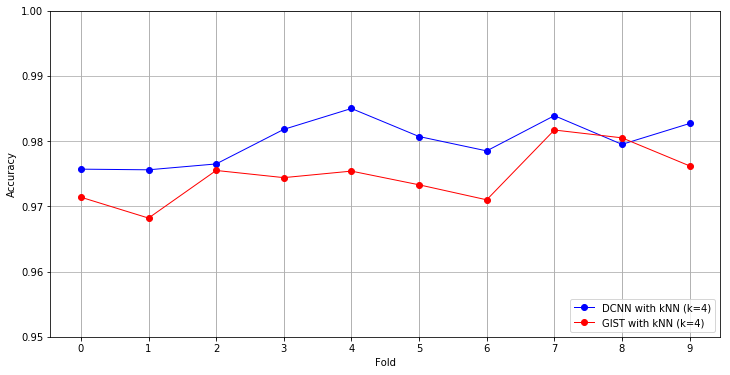

In [14]:
plot_acc(accdict4)